In [1]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.17.0
Keras Version 3.4.1


# GPU / CPU Check

In [3]:
tf.config.list_physical_devices("GPU")

[]

In [4]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU isn't available!
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [6]:
# Creating a simple classifier using keras on MNIST data

mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [7]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
len(X_test[1][0])

28

In [10]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.


In [11]:
len(X_train_full[5000:] )

55000

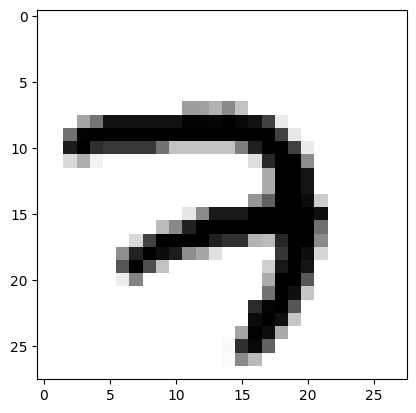

In [12]:
# Lets view some data 
plt.imshow(X_train[0], cmap="binary")
plt.show()

<Axes: >

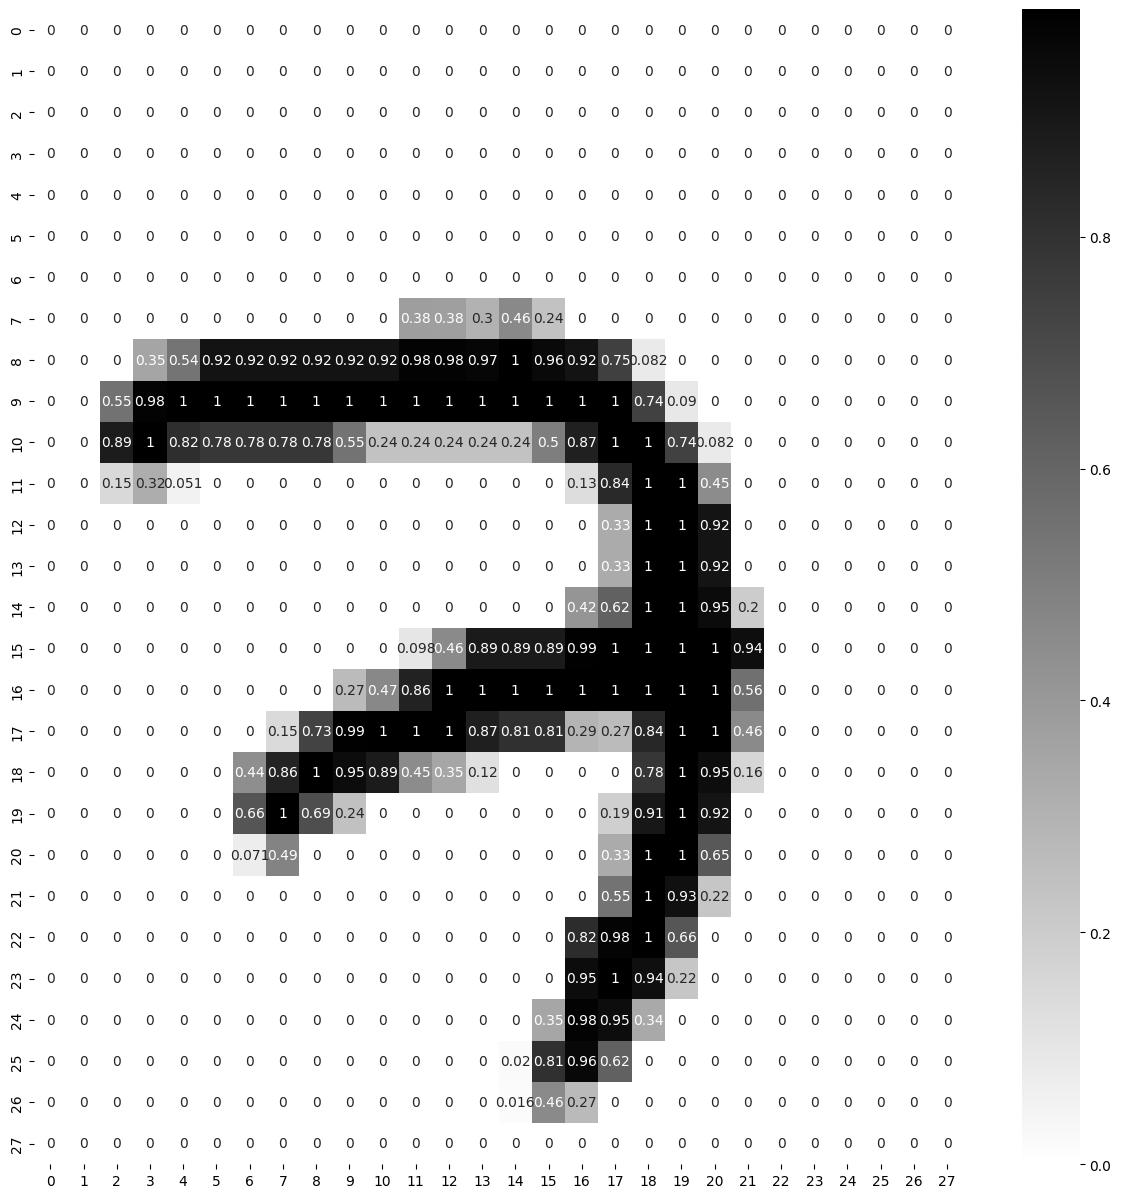

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [14]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [16]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer1 (Dense)                 │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [18]:
len(hidden1.get_weights()[1])

300

In [19]:
hidden1.get_weights()

[array([[ 0.05377704, -0.05627886, -0.02701635, ...,  0.05608124,
          0.0471902 ,  0.0684907 ],
        [-0.06244186, -0.07420186, -0.02057873, ...,  0.00244543,
         -0.02936885,  0.06714004],
        [ 0.0358788 ,  0.02037998,  0.01675805, ...,  0.03087533,
         -0.00041982,  0.04227576],
        ...,
        [-0.00323437,  0.03417286,  0.01258142, ..., -0.01859589,
         -0.03694938,  0.05114207],
        [ 0.0524866 , -0.06351986,  0.04881565, ..., -0.0066998 ,
          0.04473625,  0.05973956],
        [ 0.02579742,  0.04676218,  0.00638966, ...,  0.06997679,
          0.00201211, -0.02206507]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [20]:
weights, biases = hidden1.get_weights()

In [21]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[ 0.05377704, -0.05627886, -0.02701635, ...,  0.05608124,
         0.0471902 ,  0.0684907 ],
       [-0.06244186, -0.07420186, -0.02057873, ...,  0.00244543,
        -0.02936885,  0.06714004],
       [ 0.0358788 ,  0.02037998,  0.01675805, ...,  0.03087533,
        -0.00041982,  0.04227576],
       ...,
       [-0.00323437,  0.03417286,  0.01258142, ..., -0.01859589,
        -0.03694938,  0.05114207],
       [ 0.0524866 , -0.06351986,  0.04881565, ..., -0.0066998 ,
         0.04473625,  0.05973956],
       [ 0.02579742,  0.04676218,  0.00638966, ...,  0.06997679,
         0.00201211, -0.02206507]], dtype=float32)

In [22]:
print("shape\n", biases.shape)

shape
 (300,)


In [23]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [24]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7262 - loss: 1.0113 - val_accuracy: 0.9148 - val_loss: 0.3035
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9148 - loss: 0.3018 - val_accuracy: 0.9346 - val_loss: 0.2331
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9304 - loss: 0.2422 - val_accuracy: 0.9438 - val_loss: 0.2002
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9413 - loss: 0.2052 - val_accuracy: 0.9524 - val_loss: 0.1743
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9480 - loss: 0.1820 - val_accuracy: 0.9552 - val_loss: 0.1587
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9562 - loss: 0.1552 - val_accuracy: 0.9600 - val_loss: 0.1484
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9603 - loss: 0.1408 - val_accuracy: 0.9650 - val_loss: 0.1288
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9639 - loss: 0.125

In [26]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [25]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.838727,0.605489,0.9148,0.303481
1,0.918036,0.285453,0.9346,0.233051
2,0.933400,0.231864,0.9438,0.200212
3,0.943455,0.197655,0.9524,0.174302
4,0.951000,0.172532,0.9552,0.158653
5,0.955982,0.153027,0.9600,0.148394
6,0.961382,0.137214,0.9650,0.128814
7,0.964655,0.123772,0.9668,0.122217
8,0.968364,0.112364,0.9660,0.117562
9,0.970836,0.103019,0.9692,0.108254


<Axes: >

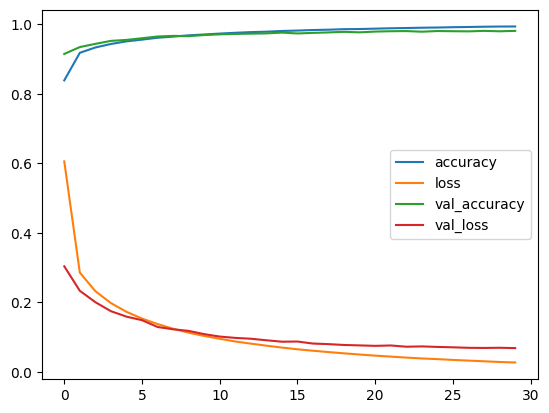

In [27]:
pd.DataFrame(history.history).plot()

In [28]:
model_clf.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9745 - loss: 0.0841


[0.07032042741775513, 0.9786999821662903]

In [29]:
x_new = X_test[:3]
# x_new

In [33]:
y_pred = np.argmax(y_prob, axis = -1)

In [34]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [35]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   ]], dtype=float32)

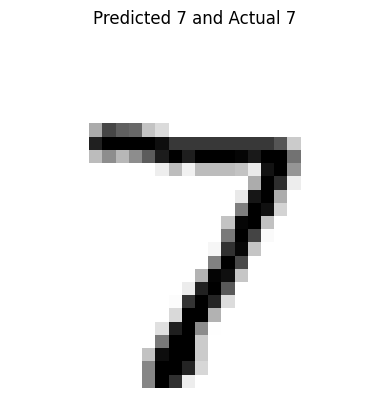

######################


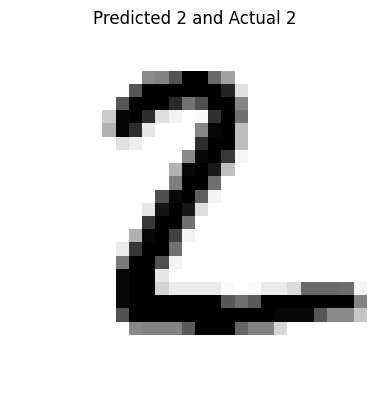

######################


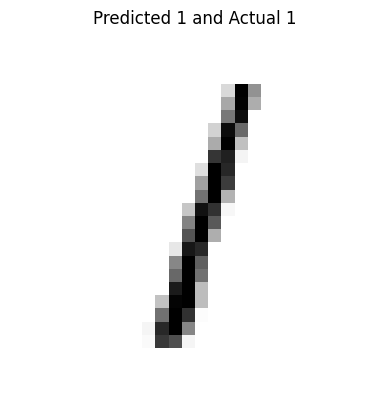

######################


In [36]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show() 
  print("######################")